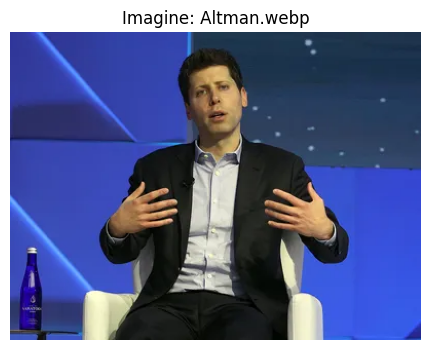

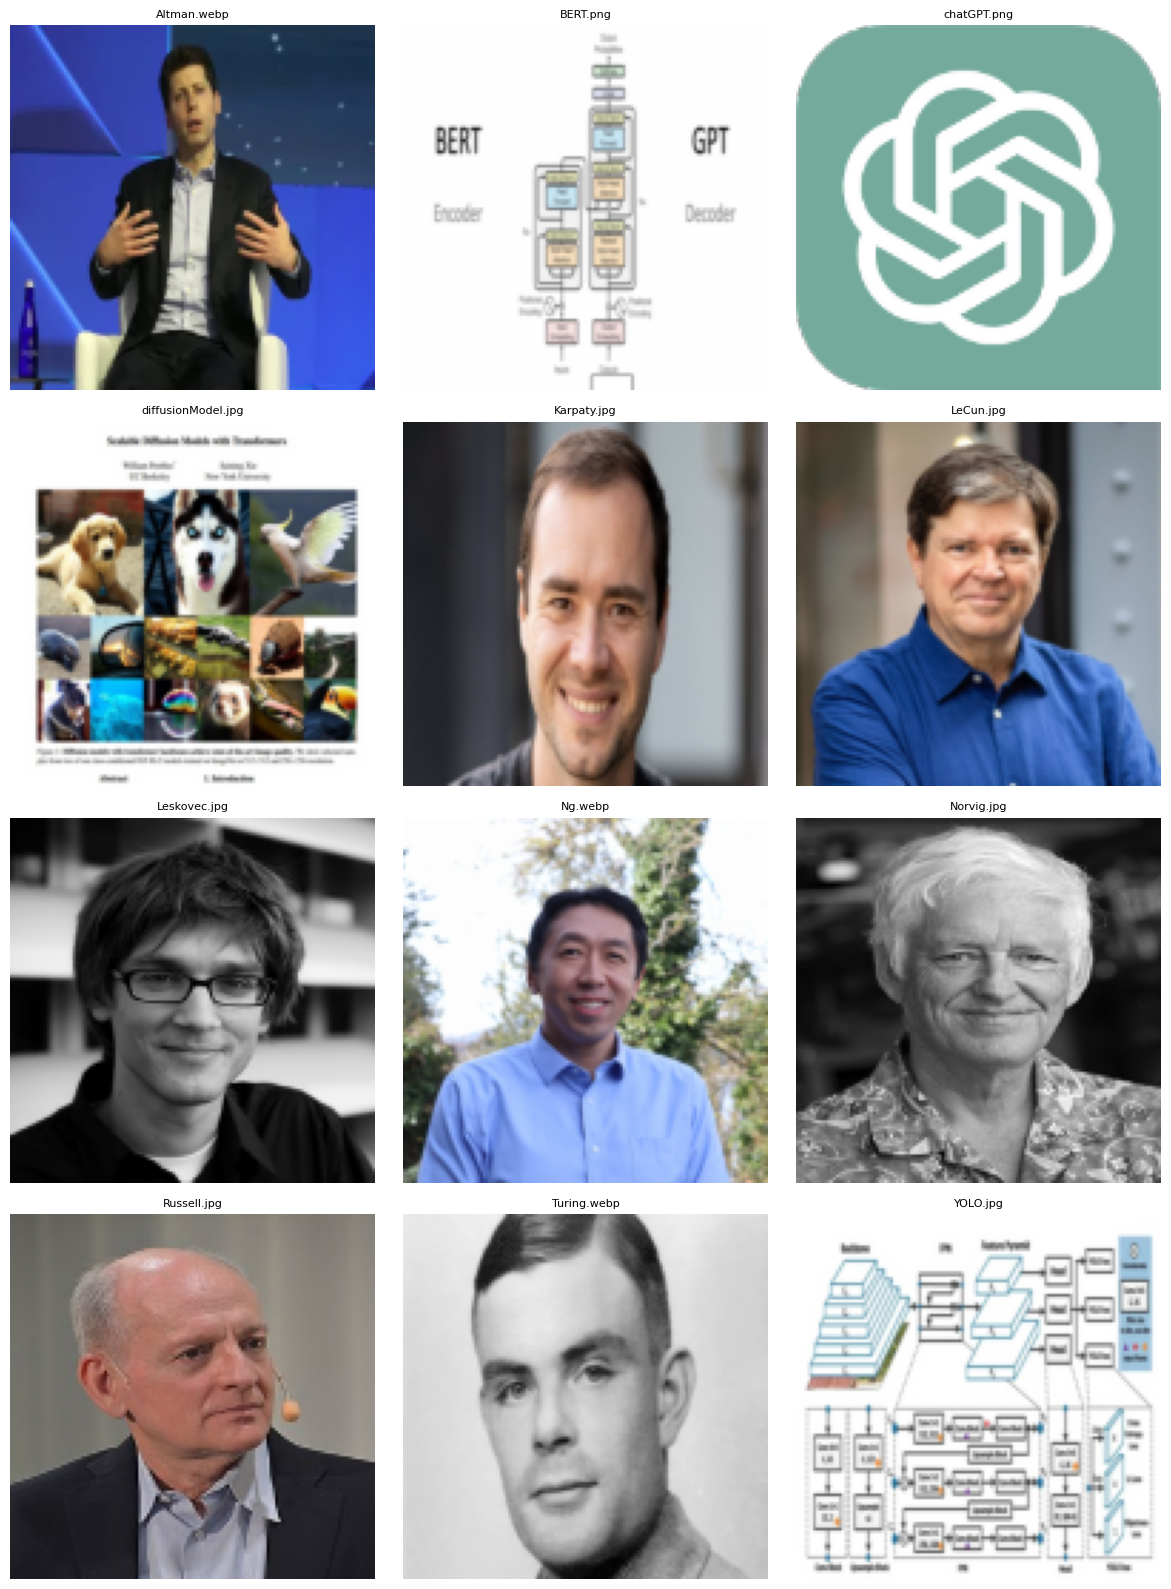

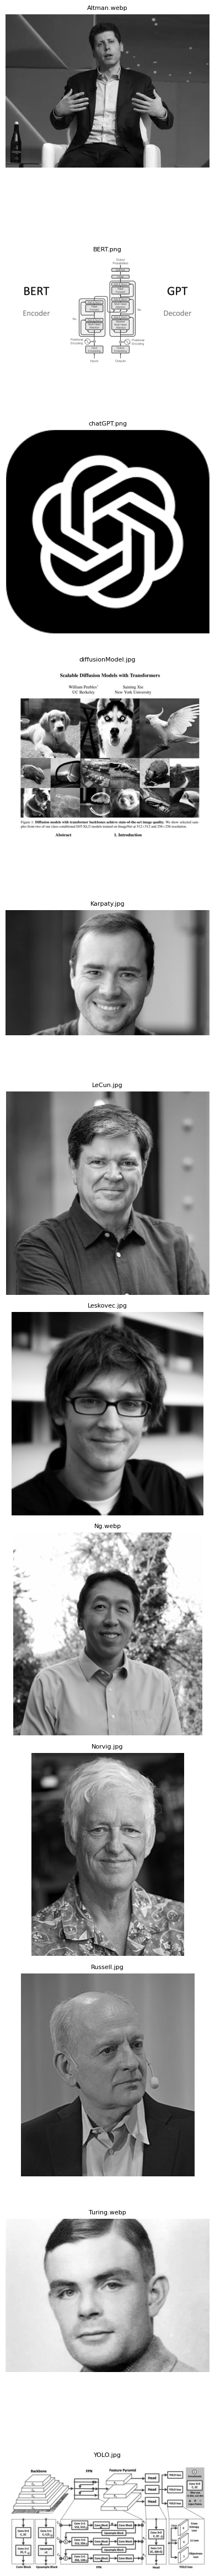

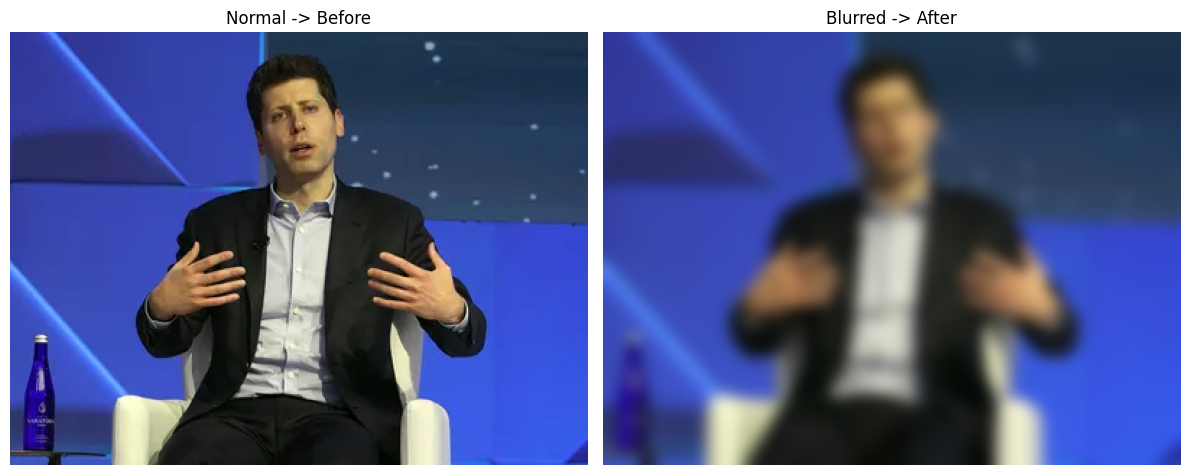

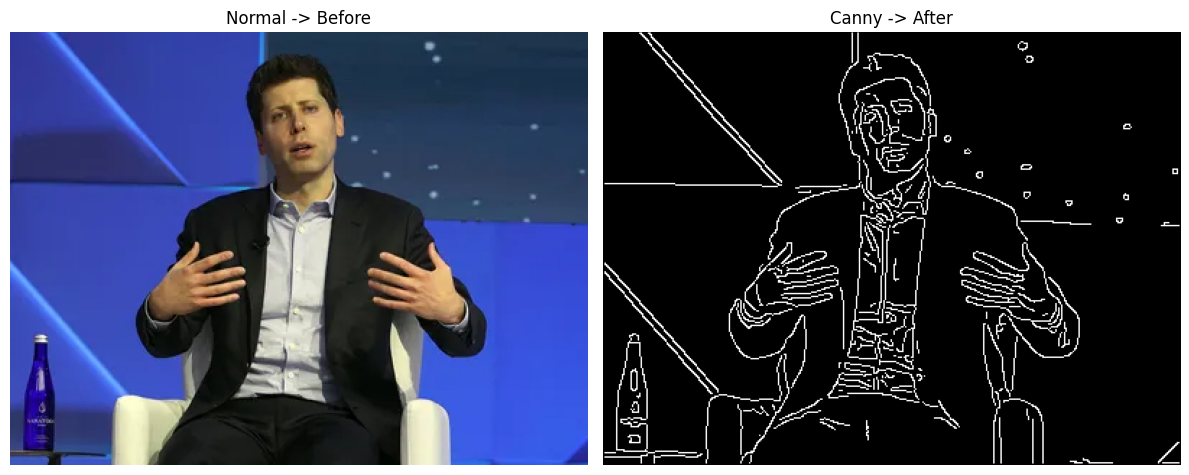

In [4]:
# 2)Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

#a. sa se vizualizeze una din imagini
#b. daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.
#c. sa se transforme imaginile in format gray-levels si sa se vizualizeze
#d  sa se blureze o imagine si sa se afiseze in format "before-after"
#e. sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

import matplotlib.pyplot as plt
from skimage import io, color, transform
from skimage.feature import canny
from skimage import filters
import os

# afisare o imagine din folder de imagni, data/images
def point_a(fp, namepic):
    path = fp + namepic
    img = io.imread(path, as_gray=False)
    plt.figure(figsize=(6, 4))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Imagine: {namepic}")
    plt.show()


# grid cu toate imagnile din data/images
def point_b(fp):
    image_files = os.listdir(fp)
    nr_images = len(image_files)
    cols = 3
    rows = 4

    fg, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

    for i, imgf in enumerate(image_files):
        if i < nr_images:
            row = i // cols
            col = i % cols

            img = io.imread(fp + imgf)

            if len(img.shape) == 3:
                width, height, channel = img.shape
                if width != 128 or height != 128:
                    img_resize = transform.resize(img, (128, 128, channel), anti_aliasing=True, preserve_range=True)
                    img_resized = img_resize.astype(img.dtype)
                    img = img_resized
                    ax[row, col].imshow(img)
            elif len(img.shape) == 2:
                width, height = img.shape
                if width != 128 or height != 128:
                    img_resize = transform.resize(img, (128, 128), anti_aliasing=True, preserve_range=True)
                    img_resized = img_resize.astype(img.dtype)
                    img = img_resized
                    ax[row, col].imshow(img, cmap='gray')
            else:
                img_resize = transform.resize(img, (128, 128), anti_aliasing=True, preserve_range=True)
                img_resized = img_resize.astype(img.dtype)
                img = img_resized
                ax[row, col].imshow(img)

            ax[row, col].set_title(imgf, fontsize=8)
            ax[row, col].axis('off')
    plt.tight_layout()
    plt.show()

# transformare imagni in gray, toate din golderul data/images
def point_c(file_p):
    image_files = os.listdir(file_p)
    fg, ax = plt.subplots(len(image_files), 1, figsize=(4, 48))

    for i, imgf in enumerate(image_files):
        img = io.imread(file_p + imgf, as_gray=True)
        ax[i].imshow(img, cmap='gray')
        ax[i].set_title(imgf, fontsize=8)
        ax[i].axis('off')
    plt.tight_layout()
    plt.show()

# blurare o imagine din folder 
# params: path + nume_foto
def point_d(file_p, namepic):
    img = io.imread(file_p + namepic, as_gray=False)
    fg, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img)
    ax[0].set_title("Normal -> Before")
    ax[0].axis('off')

    img_blurred = filters.gaussian(img, sigma=5, channel_axis=-1 if img.ndim > 2 else None, preserve_range=True)
    img_blurred = img_blurred.astype(img.dtype)

    ax[1].imshow(img_blurred)
    ax[1].axis('off')
    ax[1].set_title("Blurred -> After")

    plt.tight_layout()
    plt.show()

# folosisrea algoritmului lui canny pt a obtine contur
# Alg Canny :
# 1. Reducerea zgomotului
# 2. Calculul gradientului
# 3.Suprimarea non-maximelor (subtiare margini):
# 4. Dublul prag
#5.Viz marginilor prin istereza (asig ca zgomot nu gfragmenteaza)

def point_e(file_p, namepic):
    img = io.imread(file_p + namepic)

    fg, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img)
    ax[0].set_title("Normal -> Before")
    ax[0].axis('off')

    if len(img.shape) == 3:
        if img.shape[2] == 3:
            img = color.rgb2gray(img)
        elif img.shape[2] == 4:
            img_rgb = img[:, :, :3]
            img = color.rgb2gray(img_rgb)
        else:
            img = color.rgb2gray(img[:, :, :3])
    edges = canny(img, sigma=1)
    ax[1].imshow(edges, cmap='gray')
    ax[1].axis('off')
    ax[1].set_title("Canny -> After")
    plt.tight_layout()
    plt.show()


filepath = "data/images/"
name_pic = "Altman.webp"
point_a(filepath, name_pic)
point_b(filepath)
point_c(filepath)
point_d(filepath, name_pic)
point_e(filepath, name_pic)
